In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews(1) (1).csv")

In [ ]:
data.head(2)

,Unnamed: 0,Name,Type,Reviews
0,0,1. EAST-EAST ASIAN SPICE TRAIL,"Chinese, Japanese","“... with oyster, basil, bird eye chili and pe..."
1,1,2. Saptami,"Indian, Asian","“... a special mention,for his excellent...” ..."


In [ ]:
data

,Unnamed: 0,Name,Type,Reviews
0,0,1. EAST-EAST ASIAN SPICE TRAIL,"Chinese, Japanese","“... with oyster, basil, bird eye chili and pe..."
1,1,2. Saptami,"Indian, Asian","“... a special mention,for his excellent...” ..."
2,2,3. Mabruk,"Lebanese, Mediterranean",“Amazing food and hospitality” “Nice food and...
3,3,4. Namak,Indian,"“... many more options like lobsters, salmon, ..."
4,4,5. The Earth Plate,"Indian, International",“... - China town Hakka noodles Paneer chili F...
5,5,6. Peshawri,"Indian, Healthy",“Food was excellent as well especially the chi...
6,6,7. Tanatan,"Indian, Middle Eastern",“Amchi Tanatan Prawns These Cripsy tiger fried...
7,7,8. Rasoi Kitchen & Bar,Indian,“The BURNT GARLIC CHICKEN FRIED RICE came a bi...
8,8,9. Kebabs & Kurries,Indian,“Great Indian fare - as expected!” “Birthday ...
9,9,10. Ummrao,Indian,“Amazing North Indian Delicacies” “MAIN COURS...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Restaurant reviews (1).csv")

In [ ]:
data.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [ ]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def categorise(row):  
    if isfloat(row['Rating']):
        if float(row['Rating']) >=  0 and float(row['Rating']) < 3:
            return 0
        elif float(row['Rating']) >= 3 and float(row['Rating']) <= 5:
            return 1
        return 0
    return 0

data['recom'] = data.apply(lambda row: categorise(row), axis=1)

In [ ]:
data.drop(['recom'], axis=1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [ ]:
# def isfloat(num):
#     try:
#         float(num)
#         return True
#     except ValueError:
#         return False

# def categorise(row):  
#     if isfloat(row['Rating']):
#         if float(row['Rating']) >=  0 and float(row['Rating']) < 3:
#             return 0
#         elif float(row['Rating']) >= 3 and float(row['Rating']) <= 5:
#             return 1
#         return 0
#     return 0

# data['recom'] = data.apply(lambda row: categorise(row), axis=1)

In [ ]:
data.head(100)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,recom
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,1
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,1
...,...,...,...,...,...,...,...,...
95,Beyond Flavours,Gaurav Saini,Was there for office lunch outing. Rating woul...,3,"5 Reviews , 7 Followers",5/4/2019 16:56,0,1
96,Beyond Flavours,Kailash Sain,I really enjoyed the follows....\nThe entrance...,5,1 Review,5/3/2019 20:10,0,1
97,Beyond Flavours,KAILASH SAIN,I came first time in this restaurant.\nThe ent...,5,1 Review,5/3/2019 20:06,0,1
98,Beyond Flavours,Yaswanth Chowdary,Pathetic and horrible experience\nAmbience and...,2,"4 Reviews , 56 Followers",5/3/2019 11:40,0,0


In [ ]:
data = data[['Review','recom']]

In [ ]:
data.shape

(10000, 2)

In [ ]:
data.rename(columns={'Review':'review_text','recom':'recommended'},inplace=True)

In [ ]:
data.head(2)

,review_text,recommended
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1


In [ ]:
data.isna().sum()

review_text    45
recommended     0
dtype: int64

In [ ]:
data['review_text'] = data['review_text'].fillna(' ')

In [ ]:
data.isna().sum()

review_text    0
recommended    0
dtype: int64

In [ ]:
data.dtypes

review_text    object
recommended     int64
dtype: object

In [ ]:
data.loc[data["recommended"] == 0, "recommended"] = "Not Recommended" # 0 -> Not Recommended
data.loc[data["recommended"] == 1, "recommended"] = "Recommended" # 1 -> Recommended

In [ ]:
data.dtypes

review_text    object
recommended    object
dtype: object

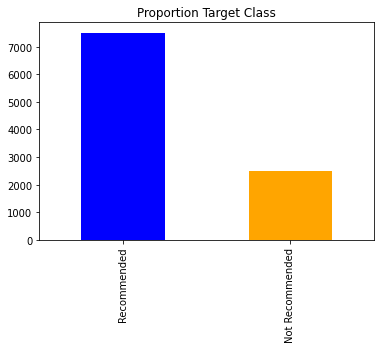

In [ ]:
count_class=pd.value_counts(data["recommended"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [ ]:
print('Recommended', round(data['recommended'].value_counts()['Recommended']/len(data) * 100), '%')
print('Not Recommended', round(data['recommended'].value_counts()['Not Recommended']/len(data) * 100), '%')

Recommended 75 %
Not Recommended 25 %


In [ ]:
count1 = Counter(" ".join(data[data['recommended']== 'Recommended']['review_text']).\
                 split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)

In [ ]:
df1 = df1.rename(columns={0: "common_words", 1 : "count"})
df1.head(10)

,common_words,count
0,the,13788
1,and,13689
2,was,7517
3,is,7352
4,a,7342
5,to,7082
6,of,5686
7,for,4867
8,with,4497
9,I,4368


In [ ]:
count2 = Counter(" ".join(data[data['recommended']== 'Not Recommended']['review_text']).\
                 split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)

In [ ]:
df2 = df2.rename(columns={0: "common_words", 1 : "count"})
df2.head(10)

,common_words,count
0,the,4258
1,and,3323
2,to,2667
3,was,2661
4,I,2046
5,is,1797
6,a,1774
7,of,1705
8,not,1596
9,for,1410


In [ ]:
data.iloc[1,0]

'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
main_text = data['review_text']
target = data['recommended']

In [ ]:
print(len(main_text))
print(len(target))

10000
10000


In [ ]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
def cons(text):
    text=expand_contractions(text,contractions_dict)
    return text

main_text = main_text.apply(cons)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tolowercase
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

main_text = main_text.apply(to_lower)

In [ ]:

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

main_text = main_text.apply(remove_special_characters)
main_text = main_text.apply(strip_punctuation)

In [ ]:
from nltk.corpus import wordnet

In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def replaceElongated(word):
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word
main_text = main_text.apply(replaceElongated)

In [ ]:

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

main_text = main_text.apply(lambda x: tokenizer.tokenize(x))

In [ ]:




def remove_stopwords(text):
    words = [w for w in text if w not in stopword_list]
    return words

main_text = main_text.apply(lambda x : remove_stopwords(x))

In [ ]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = snowball_stemmer.stem(word)
        text_list_new.append(word)
    return text_list_new
main_text = main_text.apply(stem_update)

In [ ]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)
main_text = main_text.apply(drop_numbers)
df = pd.concat([main_text,target],axis=1)
df.head(2)

,review_text,recommended
0,ambienc god fod quit god saturday lunch cost e...,Recommended
1,ambienc god pleasant even servic prompt fod go...,Recommended


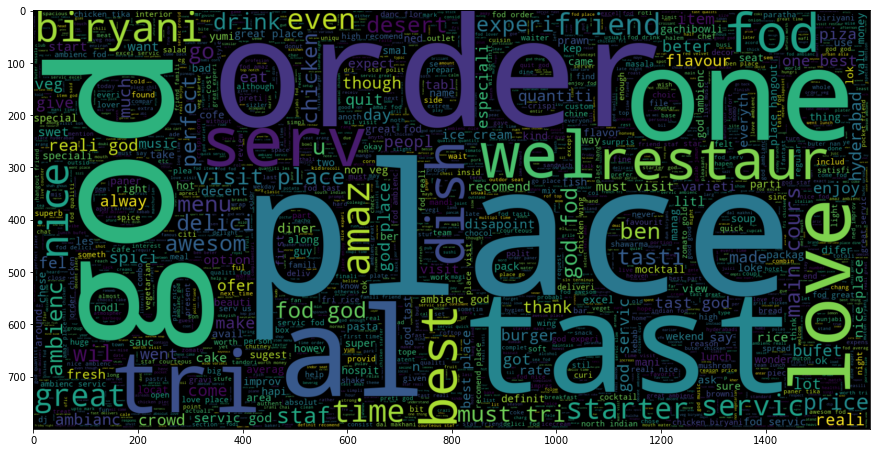

In [ ]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.recommended == 'Recommended'].review_text))
plt.imshow(wc , interpolation = 'bilinear')

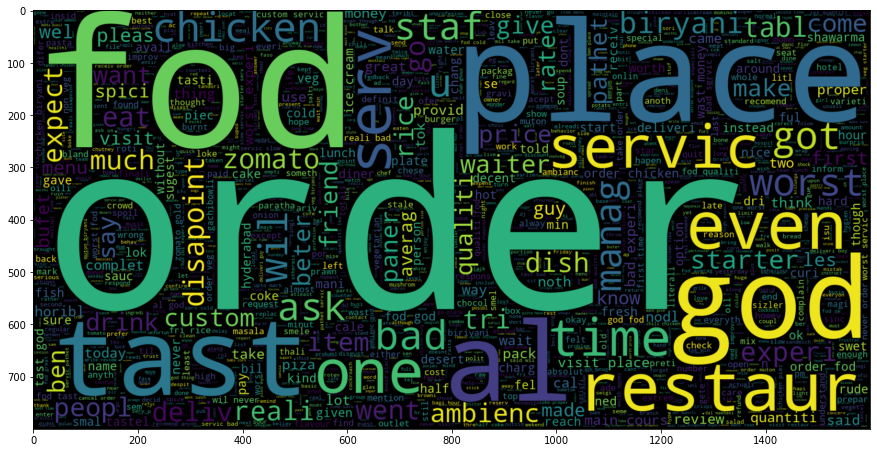

In [ ]:
plt.figure(figsize = (15,15)) # Text that is not recommended
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.recommended == 'Not Recommended'].review_text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
cv=CountVectorizer()


In [ ]:

train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)

X_train = cv.fit_transform(train_data['review_text'])
y_train = train_data['recommended']
X_test = cv.transform(test_data['review_text'])
y_test = test_data['recommended']

In [ ]:
print(X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [ ]:
nb_predict=nb.predict(X_test)

In [ ]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.911


In [ ]:
nb_report1 = recall_score(y_test,nb_predict,pos_label='Recommended',average='binary')
print('Recall:',nb_report1)

Recall: 0.9544863459037711


In [ ]:
nb_report2 = precision_score(y_test,nb_predict,pos_label='Recommended',average='binary')
print('Precision:',nb_report2)

Precision: 0.9314720812182741


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train,y_train)
# gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNeighborsClassifier(n_neighbors=20)

Random Forest

In [ ]:
rfc_predict=rfc.predict(X_test)

In [ ]:
rfc_report = accuracy_score(y_test,rfc_predict)
print('Accuracy:',rfc_report)

Accuracy: 0.891


In [ ]:
rfc_report1 = recall_score(y_test,rfc_predict,pos_label='Recommended',average='binary')
print('Recall:',rfc_report1)

Recall: 0.9557867360208062


In [ ]:
rfc_report2 = precision_score(y_test,rfc_predict,pos_label='Recommended',average='binary')
print('Precision:',rfc_report2)

Precision: 0.9074074074074074


Logistic Regression

In [ ]:
lr_predict=lr.predict(X_test)


In [ ]:
lr_report = accuracy_score(y_test,lr_predict)
print('Accuracy:',lr_report)

Accuracy: 0.9075


In [ ]:
lr_report1 = recall_score(y_test,lr_predict,pos_label='Recommended',average='binary')
print('Recall:',lr_report1)

Recall: 0.9512353706111834


In [ ]:
lr_report2 = precision_score(y_test,lr_predict,pos_label='Recommended',average='binary')
print('Precision:',lr_report2)

Precision: 0.9300699300699301


Decision Tree

In [ ]:
dtc_predict=dtc.predict(X_test)

In [ ]:
dtc_report = accuracy_score(y_test,dtc_predict)
print('Accuracy:',dtc_report)

Accuracy: 0.839


In [ ]:
dtc_report1 = recall_score(y_test,dtc_predict,pos_label='Recommended',average='binary')
print('Recall:',dtc_report1)

Recall: 0.8797139141742523


In [ ]:
dtc_report2 = precision_score(y_test,dtc_predict,pos_label='Recommended',average='binary')
print('Precision:',dtc_report2)

Precision: 0.9080536912751678


K Nearest Neighbours

In [ ]:
knn_predict=dtc.predict(X_test)

In [ ]:
knn_report = accuracy_score(y_test,knn_predict)
print('Accuracy:',knn_report)

Accuracy: 0.839


In [ ]:
knn_report1 = recall_score(y_test,knn_predict,pos_label='Recommended',average='binary')
print('Recall:',knn_report1)

Recall: 0.8797139141742523


In [ ]:
knn_report2 = precision_score(y_test,knn_predict,pos_label='Recommended',average='binary')
print('Precision:',knn_report2)

Precision: 0.9080536912751678


Comparison

In [ ]:
from tabulate import tabulate

In [ ]:
mydata = [
    ["MultionomialNB", nb_report],
    ["Random Forest", rfc_report],
    ["Logistic Regression", lr_report],
      ["Decision Tree", dtc_report],
      ["K Nearest Neighbours", knn_report]
]

In [ ]:
head = ["Model", "Score"]

In [ ]:
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------------+---------+
| Model                |   Score |
+======================+=========+
| MultionomialNB       |  0.911  |
+----------------------+---------+
| Random Forest        |  0.891  |
+----------------------+---------+
| Logistic Regression  |  0.9075 |
+----------------------+---------+
| Decision Tree        |  0.839  |
+----------------------+---------+
| K Nearest Neighbours |  0.839  |
+----------------------+---------+


In [ ]:
from csv import writer

In [ ]:
from datetime import datetime

In [ ]:
datetime.now()

datetime.datetime(2022, 10, 21, 2, 24, 22, 927794)

In [ ]:
rest = str(input())
cust = str(input())
review = str(input())
